**Задача**

Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

**Наименование файлов с данными**

course_project_train.csv - обучающий датасет<br>
course_project_test.csv - тестовый датасет

**Целевая переменная**

Credit Default - факт невыполнения кредитных обязательств

**Метрика качества**

F1-score (sklearn.metrics.f1_score)

**Требования к решению**

*Целевая метрика*
* F1 > 0.5
* Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)

*Решение должно содержать*
1. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}\_solution.ipynb, пример SShirkin\_solution.ipynb
2. Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}\_predictions.csv, пример SShirkin\_predictions.csv

*Рекомендации для файла с кодом (ipynb)*
1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. Допускается применение библиотек Python и моделей машинного обучения,
которые были в данном курсе.

**Сроки сдачи**

Cдать проект нужно в течение 5 дней после окончания последнего вебинара.
Оценки работ, сданных до дедлайна, будут представлены в виде рейтинга, ранжированного по заданной метрике качества.
Проекты, сданные после дедлайна или сданные повторно, не попадают в рейтинг, но можно будет узнать результат.

### Примерное описание этапов выполнения курсового проекта<a class="anchor" id="course_project_steps"></a>

**Построение модели классификации**
1. Обзор обучающего датасета
2. Обработка выбросов
3. Обработка пропусков
4. Анализ данных
5. Отбор признаков
6. Балансировка классов
7. Подбор моделей, получение бейзлана
8. Выбор наилучшей модели, настройка гиперпараметров
9. Проверка качества, борьба с переобучением
10. Интерпретация результатов

**Прогнозирование на тестовом датасете**
1. Выполнить для тестового датасета те же этапы обработки и постронияния признаков
2. Спрогнозировать целевую переменную, используя модель, построенную на обучающем датасете
3. Прогнозы должны быть для всех примеров из тестового датасета (для всех строк)
4. Соблюдать исходный порядок примеров из тестового датасета

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [91]:
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings("ignore")

In [102]:
TRAIN_PATH = 'C:/Users/Anatoly/Desktop/Python_and_DS/course_project/course_project_train/course_project_train.csv'
TEST_PATH = 'C:/Users/Anatoly/Desktop/Python_and_DS/course_project/course_project_test'

In [103]:
df_train = pd.read_csv(TRAIN_PATH)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [104]:
df_test = pd.read_csv(TRAIN_PATH)
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [109]:
df_train['Home Ownership'].unique()

array(['Own Home', 'Home Mortgage', 'Rent', 'Have Mortgage'], dtype=object)

In [110]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
Home Ownership                  7500 non-null object
Annual Income                   5943 non-null float64
Years in current job            7129 non-null object
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    3419 non-null float64
Bankruptcies                    7486 non-null float64
Purpose                         7500 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    5943 non-null float64
Credit Default                  7

In [112]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
Home Ownership                  7500 non-null object
Annual Income                   5943 non-null float64
Years in current job            7129 non-null object
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    3419 non-null float64
Bankruptcies                    7486 non-null float64
Purpose                         7500 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    5943 non-null float64
Credit Default                  7

Вывод по тесту и по трейну: много пропусков, необходимо коротко и четко понять сколько их и где их больше всего. Далее нужно понять чем мы будем их заполнять. 

все столбцы отправим в один список. Посчитаем количество пропущенных значений в столбце с помощью функции isna()

In [115]:
df_train.columns.values.tolist

<function ndarray.tolist>

In [118]:
def check_missing_values(df):
    columns = df.columns.values.tolist()
    for n in columns:
        if df[n].isna().sum() > 0:
            print(f"столбец '{n}' -  пропусков в столбце: {df[n].isna().sum()}")

In [119]:
check_missing_values(df_train)

столбец 'Annual Income' -  пропусков в столбце: 1557
столбец 'Years in current job' -  пропусков в столбце: 371
столбец 'Months since last delinquent' -  пропусков в столбце: 4081
столбец 'Bankruptcies' -  пропусков в столбце: 14
столбец 'Credit Score' -  пропусков в столбце: 1557


In [120]:
check_missing_values(df_test)

столбец 'Annual Income' -  пропусков в столбце: 1557
столбец 'Years in current job' -  пропусков в столбце: 371
столбец 'Months since last delinquent' -  пропусков в столбце: 4081
столбец 'Bankruptcies' -  пропусков в столбце: 14
столбец 'Credit Score' -  пропусков в столбце: 1557


Получим описание тестового и трейнового датасета с помощью стандартной функции describe()

In [123]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income,5943.0,1.366392e+06,8.453392e+05,164597.0,844341.0,1168386.0,1640137.00,1.014934e+07
Tax Liens,7500.0,3.013333e-02,2.716035e-01,0.0,0.0,0.0,0.00,7.000000e+00
Number of Open Accounts,7500.0,1.113093e+01,4.908924e+00,2.0,8.0,10.0,14.00,4.300000e+01
Years of Credit History,7500.0,1.831747e+01,7.041946e+00,4.0,13.5,17.0,21.80,5.770000e+01
Maximum Open Credit,7500.0,9.451537e+05,1.602622e+07,0.0,279229.5,478159.0,793501.50,1.304726e+09
Number of Credit Problems,7500.0,1.700000e-01,4.985978e-01,0.0,0.0,0.0,0.00,7.000000e+00
Months since last delinquent,3419.0,3.469260e+01,2.168881e+01,0.0,16.0,32.0,50.00,1.180000e+02
Bankruptcies,7486.0,1.171520e-01,3.471917e-01,0.0,0.0,0.0,0.00,4.000000e+00
Current Loan Amount,7500.0,1.187318e+07,3.192612e+07,11242.0,180169.0,309573.0,519882.00,1.000000e+08
Current Credit Balance,7500.0,2.898332e+05,3.178714e+05,0.0,114256.5,209323.0,360406.25,6.506797e+06


In [124]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income,5943.0,1.366392e+06,8.453392e+05,164597.0,844341.0,1168386.0,1640137.00,1.014934e+07
Tax Liens,7500.0,3.013333e-02,2.716035e-01,0.0,0.0,0.0,0.00,7.000000e+00
Number of Open Accounts,7500.0,1.113093e+01,4.908924e+00,2.0,8.0,10.0,14.00,4.300000e+01
Years of Credit History,7500.0,1.831747e+01,7.041946e+00,4.0,13.5,17.0,21.80,5.770000e+01
Maximum Open Credit,7500.0,9.451537e+05,1.602622e+07,0.0,279229.5,478159.0,793501.50,1.304726e+09
Number of Credit Problems,7500.0,1.700000e-01,4.985978e-01,0.0,0.0,0.0,0.00,7.000000e+00
Months since last delinquent,3419.0,3.469260e+01,2.168881e+01,0.0,16.0,32.0,50.00,1.180000e+02
Bankruptcies,7486.0,1.171520e-01,3.471917e-01,0.0,0.0,0.0,0.00,4.000000e+00
Current Loan Amount,7500.0,1.187318e+07,3.192612e+07,11242.0,180169.0,309573.0,519882.00,1.000000e+08
Current Credit Balance,7500.0,2.898332e+05,3.178714e+05,0.0,114256.5,209323.0,360406.25,6.506797e+06


В обоих датасетах (тест и трейн) одинаковое кол-во пропусков. 

# **Категориальные признаки**

In [127]:
df_train['Home Ownership'].unique()

array(['Own Home', 'Home Mortgage', 'Rent', 'Have Mortgage'], dtype=object)

Здесь будем кодировать в dummy переменные 

In [128]:
df_train['Years in current job'].unique()

array([nan, '10+ years', '8 years', '6 years', '7 years', '5 years',
       '1 year', '< 1 year', '4 years', '3 years', '2 years', '9 years'],
      dtype=object)

Здесь будем перекодировать данные в числовые по первому символу (с помощью int). 10+ лет заменим на 15, чтобы отличалось от 10. Также надо понимать, что у нас тут пропуски. Кол-во пропусков в столбце: 371. Рассмотрим признак подробнее.  

In [140]:
df_train['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

Менее 1 года = 0. Пропуск скорее всего означает то же самое. Заменим его пока нулем.  

In [165]:
df_train['Years in current job'] = df_train['Years in current job'].fillna(0)

In [166]:
def convert_years(df): 
    for year in df_train['Years in current job'].unique(): 
        if year in [0, '< 1 year']:
            df.loc[df['Years in current job'] == year, 'Number of years in current job'] = 0
        elif year == '10+ years':
            df.loc[df['Years in current job'] == year, 'Number of years in current job'] = 15 
        else:
            df.loc[df['Years in current job'] == year, 'Number of years in current job'] = int(year.split(' ')[0])
    return df

In [167]:
df_years = convert_years(df_train)

In [145]:
df_train['Years in current job'].unique()

array([nan, '10+ years', '8 years', '6 years', '7 years', '5 years',
       '1 year', '< 1 year', '4 years', '3 years', '2 years', '9 years'],
      dtype=object)

In [129]:
df_train['Purpose'].unique()

array(['debt consolidation', 'other', 'home improvements', 'take a trip',
       'buy a car', 'small business', 'business loan', 'wedding',
       'educational expenses', 'buy house', 'medical bills', 'moving',
       'major purchase', 'vacation', 'renewable energy'], dtype=object)

Здесь слишком много признаков и не понятно по логике с чем их связывать. По идее тоже нужно в dummy, но может быть получится заменить столбец или сгруппировать с annual income и найти зависимость... Пока нерепрезентативно. 

In [130]:
df_train['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

Здесь также кодируем в dummy переменные. 

In [141]:
def conversion_dummy(df, dummy_column):
    for cat_feature in dummy_column:
        df = pd.concat([df, pd.get_dummies(df[cat_feature], prefix=cat_feature)], axis=1)
    return df

In [142]:
dummy_train = conversion_dummy(df_train, ['Home Ownership', 'Term'])

In [143]:
dummy_train

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Term_Long Term,Term_Short Term
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,...,47386.0,7914.0,749.0,0,0,0,1,0,0,1
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,...,394972.0,18373.0,737.0,1,0,0,1,0,1,0
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,...,308389.0,13651.0,742.0,0,0,1,0,0,0,1
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,...,95855.0,11338.0,694.0,0,0,0,1,0,0,1
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,...,93309.0,7180.0,719.0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,402192.0,< 1 year,0.0,3.0,8.5,107866.0,0.0,NaN,0.0,...,73492.0,1900.0,697.0,0,0,0,0,1,0,1
7496,Home Mortgage,1533984.0,1 year,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,...,456399.0,12783.0,7410.0,1,0,1,0,0,1,0
7497,Rent,1878910.0,6 years,0.0,12.0,32.1,1778920.0,0.0,NaN,0.0,...,477812.0,12479.0,748.0,0,0,0,0,1,0,1
7498,Home Mortgage,NaN,NaN,0.0,21.0,26.5,1141250.0,0.0,NaN,0.0,...,476064.0,37118.0,NaN,0,0,1,0,0,0,1


# Количественные признаки

**Number of Open Account - колво открытых счетов**

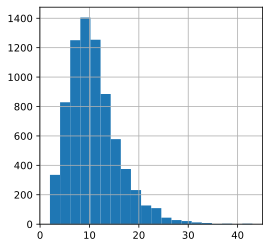

In [134]:
df_train.loc[:, 'Number of Open Accounts'].hist(figsize=(4, 4), bins=20, grid=True);

На схеме явно видно, что более 22-23 счетов - скорее выброс, чем нормальное явление. Его можно заменить модой. 

In [135]:
##Annual income - годовой доход

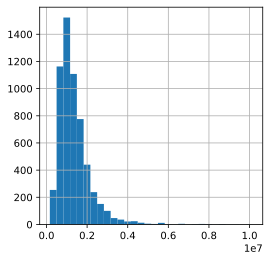

In [138]:
df_train.loc[:, 'Annual Income'].hist(figsize=(4, 4), bins=30, grid=True);

1) Как мы помним, тут много пропусков в таблице: 1557. Примерно 20% от нашей выборки. 

**Tax Liens - общее кол-во налогов к оплате**

In [169]:
df_train['Tax Liens'].value_counts()

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64

**Years of Credit History - сколько лет кредитной истории**

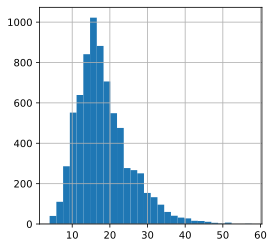

In [170]:
df_train.loc[:, 'Years of Credit History'].hist(figsize=(4, 4), bins=30, grid=True);

Пенсия в США начинается с 65 лет. С 18, допустим, можно взять кредит. Тогда значение выше 47 будет считаться как выброс. Заменим его не медианное значение. 

In [172]:
df_train.loc[df_train['Years of Credit History'] > 47, :].shape[0]

15

**Number of Credit Problems - количество проблем c кредитом**

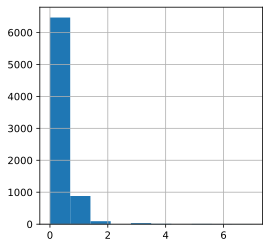

In [219]:
df_train.loc[:, 'Number of Credit Problems'].hist(figsize=(4, 4), bins=10, grid=True)

In [174]:
df_train['Number of Credit Problems'].value_counts()

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64

In [175]:
df_train.loc[df_train['Number of Credit Problems'] > 1, :].shape[0]

149

**Maximum Open Credit - наибольший открытый кредит**

Стандартное отклонение намного выше 3/4 квантиля (примерно на 3 знака). Все, что выше 3/4 квантиля + среднее значение будем считать выбросом. Заменим на медиану. 

In [185]:
df_train.loc[df_train['Maximum Open Credit'] > 1300000, :].shape[0]

684

**Bankruptcies - банкротства**

In [186]:
df_train['Bankruptcies'].unique()

array([ 1.,  0.,  3., nan,  2.,  4.])

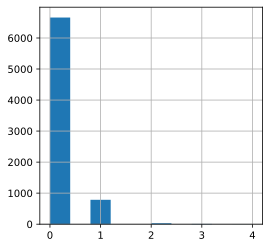

In [194]:
df_train.loc[:, 'Bankruptcies'].hist(figsize=(4, 4), bins=10, grid=True)

In [188]:
df_train['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

Пропуски заменяем модой. 

**Months since last delinquent - количество месяцев с последней просрочки платежа**

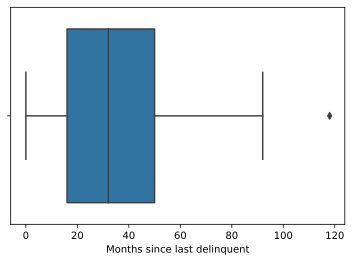

In [190]:
sns.boxplot(df_train['Months since last delinquent'])

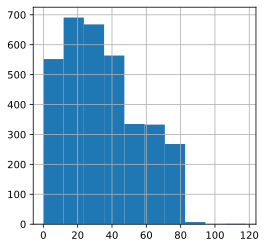

In [195]:
df_train.loc[:, 'Months since last delinquent'].hist(figsize=(4, 4), bins=10, grid=True)

In [204]:
df_train.loc[df_train['Months since last delinquent'] > 100].shape[0]

1

Пропуски заменим на нули, потому что скорее всего человек изрядно платит по кредитам. 

будем считать все, что свыше 100 - выбросы. 

**Current Loan Amount - текущая сумма кредита**

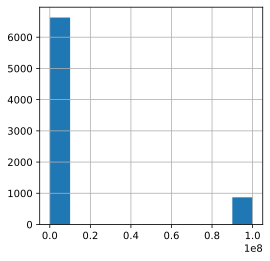

In [199]:
df_train.loc[:, 'Current Loan Amount'].hist(figsize=(4, 4), bins=10, grid=True)

In [206]:
df_train.loc[df_train['Current Loan Amount'] == 99999999.0].shape[0]

870

In [208]:
df_train.loc[(df_train['Current Loan Amount'] == 99999999.0) & (df_train['Credit Default'] == 0)].shape[0]

870

Ну вот мы и вскрыли первый признак, что датасет был искусственно искалечан... 

**Monthly Debt - ежемесячный долг**

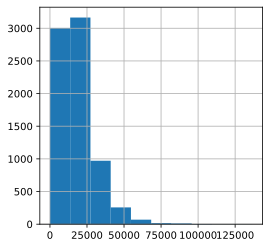

In [212]:
df_train.loc[:, 'Monthly Debt'].hist(figsize=(4, 4), bins=10, grid=True)

In [211]:
df_train.loc[df_train['Monthly Debt'] > 50000, 'Monthly Debt'].shape[0]

156

3/4 oт Annual Income = 1 700 000 usd. Следовательно, логично предположить, что платеж в 125 000 может быть. Заменим то, что свыше 50 000 тысяч на медиану. 

**Current Credit Balance - текущий кредитный баланс**

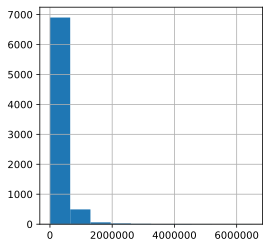

In [213]:
df_train.loc[:, 'Current Credit Balance'].hist(figsize=(4, 4), bins=10, grid=True)

In [214]:
df_train.loc[df_train['Current Credit Balance'] > 1500000].shape[0]

74

Кредитный лимит на карте в 1 500 000 видится еще разумным. Примерно столько составляет 3/4 от Annual Income. Все, что свыше - выброс. 

**'Credit Score' Кредитный рейтинг**

Кредитный рейтинг от 300 до 850 баллов. 

Все, что ниже 300 и выше 850 будем считать как выброс данных. 

In [218]:
df_train['Credit Score'].isna().sum()

1557

Пропуски заменим на нули. Некоторые выбросы - на медиану. Про кредитный скоринг писал выше. 

In [222]:
def fillna_df(df):
    df['Credit Score'] = df['Credit Score'].fillna(0)
    df.loc[(df['Credit Score'] < 300) | (df['Credit Score'] > 850), 'Credit Score'] = 0
    df['Bankruptcies'] = df['Bankruptcies'].fillna(df['Bankruptcies'].mode()[0])
    df['Months since last delinquent'] = df['Months since last delinquent'].fillna(0)
    df['Years in current job'] = df['Years in current job'].fillna(0)
    df.loc[df['Number of Credit Problems'] > 1, 'Number of Credit Problems'] = 1
    df.loc[df['Bankruptcies'] > 1, 'Bankruptcies'] = 1
    return df

def clear_df(sourse_df, df):
    df.loc[df['Tax Liens'] > 1, 'Tax Liens'] = 1
    df.loc[df['Maximum Open Credit'] > 1300000, 'Maximum Open Credit'] = sourse_df['Years of Credit History'].median()
    df.loc[df['Months since last delinquent'] > 100, 'Months since last delinquent'] = sourse_df['Months since last delinquent'].median()
    df.loc[df['Number of Open Accounts'] > 23, 'Number of Open Accounts'] = sourse_df['Number of Open Accounts'].median()
    df.loc[df['Years of Credit History'] > 47, 'Years of Credit History'] = sourse_df['Years of Credit History'].median()
    df.loc[df['Current Credit Balance'] > 1250000, 'Current Credit Balance'] = sourse_df['Current Credit Balance'].median()
    df.loc[df['Monthly Debt'] > 50000, 'Monthly Debt'] = sourse_df['Monthly Debt'].median()
    return df

Вопросы по теоретической части урока 1:

- Привести по 2 примера, когда лучше максимизировать Precision, а когда Recall?
- Почему мы используем F-меру, почему, например, нельзя просто взять среднее от Precision и Recall?

*Precision* - точность отражает какой процент объектов, отнесённых к "основному" классу, действительно являются таковыми.

*Recall* - полнота отражает какой процент объектов "основного" класса было обнаружено алгоритмом.

<center>$\large precision = \LARGE \frac{TP}{TP \: + \: FP} \:\:\:\:\: \large recall = \LARGE \frac{TP}{TP \: + \: FN}$<center>

Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

Классической задачей по балансу этих метрик является отток клиентов (сотовая связь, подписка на Netflix). 
Precision = 
FN = объект отнесли к неправильному классу, но он им не оказался. 
FP = объект отнесли к предсказанному классу, но он им не оказался. 

Максимизация precision или recall относится к бизнес задачам Machine learning. FN увеличивают в случае, когда цена ошибки стоит жизни миллионов: распознавание лиц преступников, детектирование запрещенных препаратов или классификация опасных объектов на аэропорту, АЭС, ГЭС. 
FP: при обнаружении спама относит хорошее письмо к спаму, рекомендация Перекрестка по покупке ранее купленных аналогичных товаров. 

- 2 вопрос: Precision и Recall дают довольно исчерпывающую характеристику классификатора, причем «с разных углов». Обычно при построении подобного рода систем приходится все время балансировать между двумя этими метриками. Если вы пытаетесь повысить Recall, делая классификатор более «оптимистичным», это приводит к падению Precision из-за увеличения числа ложно-положительных ответов. Если же вы подкручиваете свой классификатор, делая его более «пессимистичным», например, строже фильтруя результаты, то при росте Precision это вызовет одновременное падение Recall из-за отбраковки какого-то числа правильных ответов. Поэтому удобно для характеристики классификатора использовать одну величину, так называемую метрику F1. 